In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensate')
import System_backend as S

## Simulate the system over time with reset-crosslinkers

In [10]:
system = S.System(ell_tot=100,
                rho0 = 0.001,
                temperature = 0.1,
                seed = 98743)

In [11]:
for step in range(1000):
    if step%100==0:
        print(step)
        system.reset_crosslinkers()
    system.evolve()

0
100
200
300
400
500
600
700
800
900


(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='y'>)

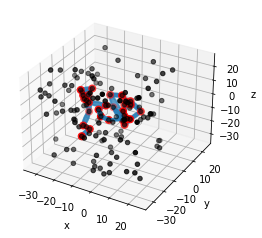

In [14]:
system.Plot3DSystem()